# Titanic Dataset: EDA
## Task 1

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

### Loading Data

In [2]:
data=pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### About the data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Dropping unnecessary columns

In [6]:
data.drop(['Cabin','Ticket'],axis=1,inplace=True)

#### As most of the passengers started from Southampton, we will fill the two missing as Southampton

In [7]:
data['Embarked'].fillna('S',inplace=True)

In [8]:
data.shape

(891, 10)

In [9]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [10]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Survival rates
#### Only about 38% of the people have survived

In [11]:
print('Total No. of Passengers=',data.shape[0])
print('Total No. of Passengers Survived=',data['Survived'].value_counts()[1],' (%.2f)'%(data['Survived'].value_counts(normalize=True)[1]*100))

Total No. of Passengers= 891
Total No. of Passengers Survived= 342  (38.38)


In [12]:
print('Total No. of Males Travelled=',data['Sex'].value_counts()['male'])
print('Total No. of Females Travelled=',data['Sex'].value_counts()['female'])

Total No. of Males Travelled= 577
Total No. of Females Travelled= 314


<AxesSubplot:>

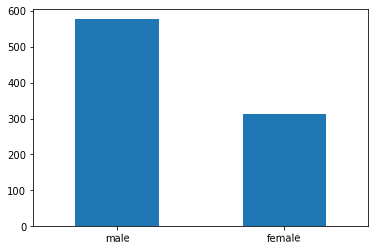

In [13]:
data['Sex'].value_counts().plot(kind='bar',rot=1)

<AxesSubplot:>

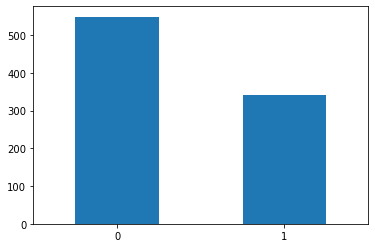

In [14]:
data['Survived'].value_counts().plot(kind='bar',rot=1)

In [15]:
print('No. of males survived=',data[data['Sex']=='male']['Survived'].value_counts()[1])
print('No. of females survived=',data[data['Sex']=='female']['Survived'].value_counts()[1])

No. of males survived= 109
No. of females survived= 233


In [16]:
pd.crosstab(data['Sex'],data['Survived'],margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


<AxesSubplot:xlabel='Survived', ylabel='count'>

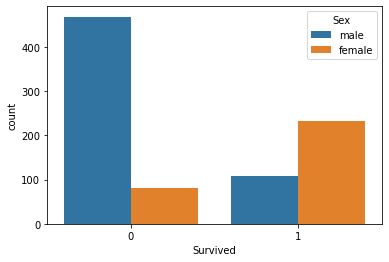

In [17]:
sns.countplot(x='Survived',data=data,hue='Sex')

### Count of people from different places who travelled in Titanic

In [18]:
data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [19]:
def embark_names(x):
    if x=='S':
        return 'Southampton'
    elif x=='C':
        return 'Cherbourg'
    elif x=='Q':
        return 'Queenstown'

In [20]:
data['Embarked']=data['Embarked'].apply(embark_names)

In [21]:
pd.crosstab([data['Sex'],data['Survived']],data['Embarked'],margins=True)

Embarked         Cherbourg  Queenstown  Southampton  All
Sex    Survived                                         
female 0                 9           9           63   81
       1                64          27          142  233
male   0                66          38          364  468
       1                29           3           77  109
All                    168          77          646  891

<AxesSubplot:>

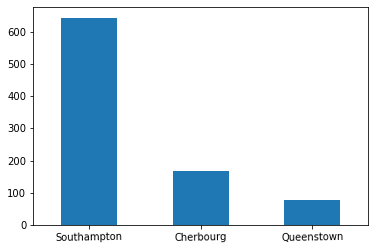

In [22]:
plt.figure()
data['Embarked'].value_counts().plot(kind='bar',rot=1)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

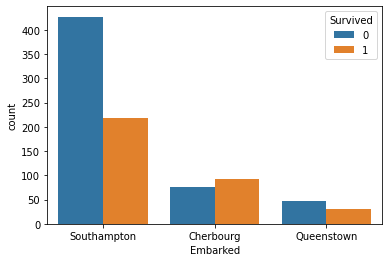

In [23]:
sns.countplot(x='Embarked',data=data,hue='Survived')

### Analysis of people travelled in diiferent classes

In [24]:
data['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [25]:
print('No. of people travelled in first class=',data['Pclass'].value_counts()[1])
print('No. of people travelled in second class=',data['Pclass'].value_counts()[2])
print('No. of people travelled in third class=',data['Pclass'].value_counts()[3])

No. of people travelled in first class= 216
No. of people travelled in second class= 184
No. of people travelled in third class= 491


<AxesSubplot:xlabel='Pclass', ylabel='count'>

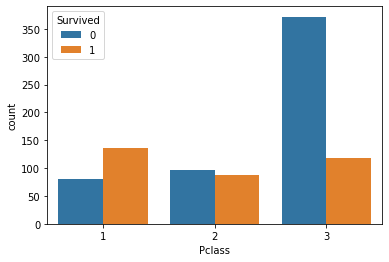

In [26]:
sns.countplot(x='Pclass',data=data,hue='Survived')

We can see that people who travelled in first class has high survival rate than people fromm second class and the there is a huge gap between the survival of first and third class people

In [27]:
pd.crosstab([data['Sex'],data['Survived']],data['Pclass'],margins=True)

Pclass             1    2    3  All
Sex    Survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891

### Age groups and their survival

(array([40., 14., 15., 31., 79., 98., 85., 84., 73., 45., 35., 35., 29.,
        16., 13., 11.,  4.,  5.,  1.,  1.]),
 array([ 0.42 ,  4.399,  8.378, 12.357, 16.336, 20.315, 24.294, 28.273,
        32.252, 36.231, 40.21 , 44.189, 48.168, 52.147, 56.126, 60.105,
        64.084, 68.063, 72.042, 76.021, 80.   ]),
 <BarContainer object of 20 artists>)

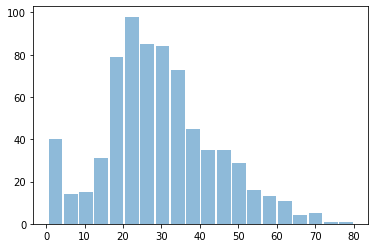

In [28]:
plt.hist(data['Age'],bins=20,alpha=0.5,rwidth=0.9)

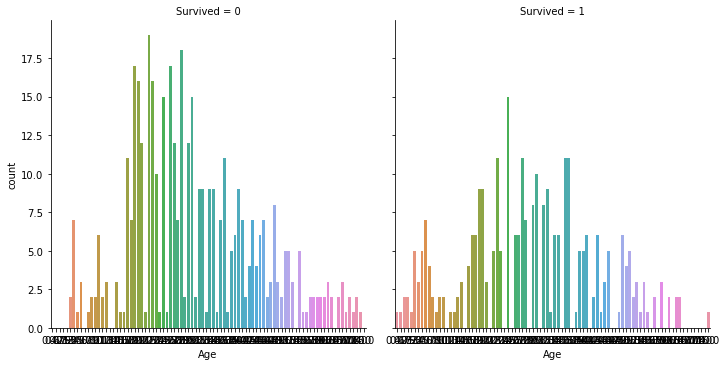

In [29]:
sns.catplot(x='Age',data=data,col='Survived',kind='count')

<AxesSubplot:xlabel='Sex', ylabel='Age'>

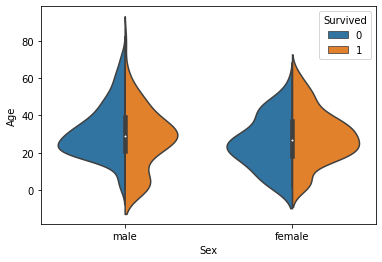

In [30]:
sns.violinplot(x='Sex',y='Age',hue='Survived',data=data,split=True)

### About people who travelled together as a family

In [31]:
data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [32]:
print('No. of people who travelled alone=',data[(data['SibSp']==0) & (data['Parch']==0)].shape[0])

No. of people who travelled alone= 537


<AxesSubplot:xlabel='SibSp', ylabel='count'>

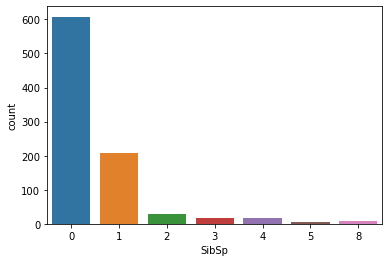

In [33]:
sns.countplot(x=data['SibSp'])

<AxesSubplot:xlabel='Parch', ylabel='count'>

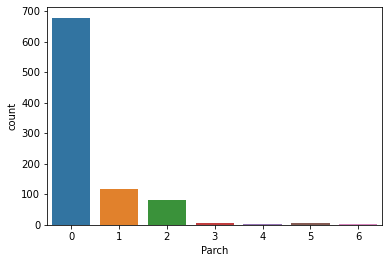

In [34]:
sns.countplot(x=data['Parch'])

#### Using  SibSp and Parch to find the total no. of family members

In [35]:
data['FamilyMem']=data['SibSp']+data['Parch']

<AxesSubplot:xlabel='FamilyMem', ylabel='count'>

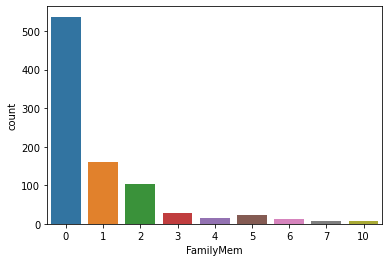

In [36]:
sns.countplot(x=data['FamilyMem'])

### Fare distribution 
#### From the below graph, we can see that most people travelled in low fare tickets

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  25.61646,  51.23292,  76.84938, 102.46584, 128.0823 ,
        153.69876, 179.31522, 204.93168, 230.54814, 256.1646 , 281.78106,
        307.39752, 333.01398, 358.63044, 384.2469 , 409.86336, 435.47982,
        461.09628, 486.71274, 512.3292 ]),
 <BarContainer object of 20 artists>)

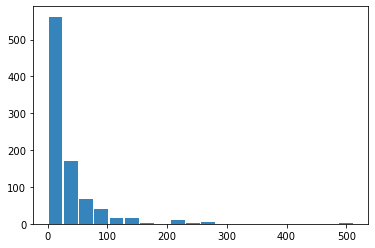

In [37]:
plt.hist(data['Fare'],bins=20,alpha=0.9,rwidth=0.9)

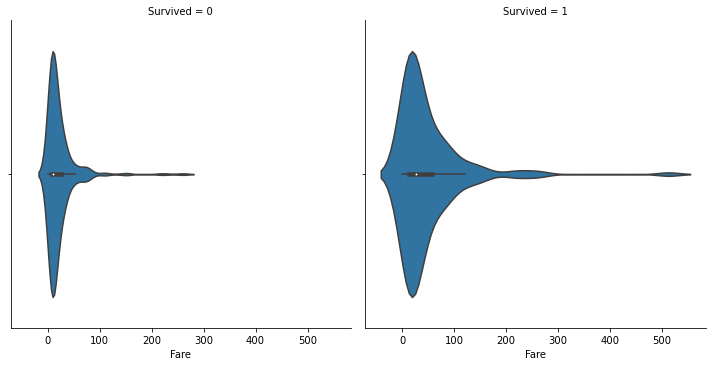

In [38]:
sns.catplot(x='Fare',data=data,col='Survived',kind='violin')

We can see that people travelled in high fare tickets as more survival rate

<AxesSubplot:>

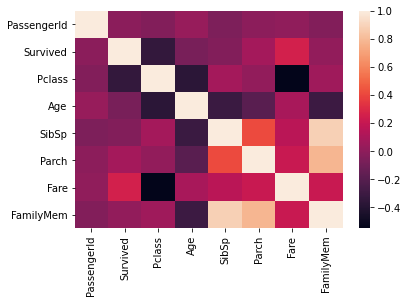

In [39]:
sns.heatmap(data.corr())

### Outliers

<AxesSubplot:xlabel='Fare'>

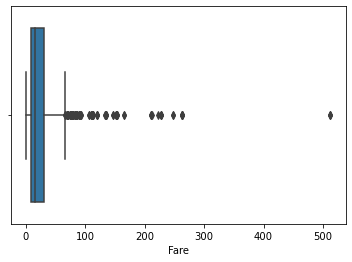

In [40]:
sns.boxplot(data['Fare'])

<AxesSubplot:xlabel='Age'>

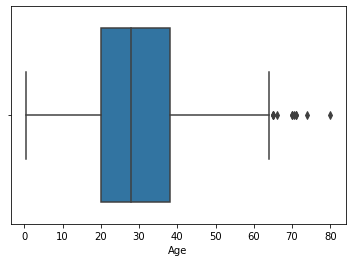

In [41]:
sns.boxplot(data['Age'])